# Twitter Text Analysis


## Introduction
Twitter has become a powerful platform for individuals from various domains to communicate, share insights, and engage with the public. In this project, we delve into the rich dataset of tweets from six influential figures: Alexandria Ocasio-Cortez (AOC), Bernie Sanders, Bill Gates, Cristiano Ronaldo, Elon Musk, and Emmanuel Macron. By harnessing the vast wealth of information encapsulated in their tweets, we aim to uncover meaningful insights through a comprehensive text analysis.


**Objectives:**
* Conducting Data Cleaning and EDA on a text-based dataset.
* Performing sentiment analysis on social media using VADER.
* Employ topic modeling techniques such as Latent Dirichlet Allocation (LDA) to identify prevalent topics within the tweets.
* Analyze the engagement metrics (likes, retweets) to gauge the popularity and impact of the tweets.
* Compare the tweeting patterns, sentiment, and topics discussed among the different figures.
* Identify emerging trends and recurring themes across the tweets over time.

**Relevance:**
* Understanding the sentiment expressed by political figures such as AOC and Bernie Sanders can offer insights into public perception and policy priorities.
* Analyzing tweets from Bill Gates and Elon Musk provides a glimpse into advancements in technology, entrepreneurship, and innovation.
Sports and Celebrity Influence:
* Cristiano Ronaldo's tweets offer perspectives on sportsmanship, lifestyle, and philanthropy.
* Tweets from Emmanuel Macron shed light on diplomatic initiatives, global issues, and European politics.
*Public Engagement and Opinion: By analyzing engagement metrics, we can gauge the public's response to tweets and assess their impact on social media.
* Academic Contribution: This project contributes to the field of text analysis by showcasing the application of NLP techniques to real-world Twitter data from diverse personalities.
* Practical Applications: Insights from this analysis can be beneficial for businesses, policymakers, media, and researchers to understand public sentiment, emerging trends, and influential voices in today's digital landscape.

**Project Date:** Basic exploratory analysis finished Fall 2022. Further in-depth analysis in-progress March 2024.

In [11]:
# Project Set-up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")

def horiz_concat_df(dict_of_df, head=None):
    """
    Horizontally concatenante multiple DataFrames for easier visualization. 
    Each DataFrame must have the same columns.
    """
    df = pd.concat([df.reset_index(drop=True) for df in dict_of_df.values()], axis=1, keys=dict_of_df.keys())
    if head is None:
        return df
    return df.head(head)

## Part I. Importing the Dataset


Data sourced from [Twitter APIs](https://developer.twitter.com/en/docs/twitter-api). The current dataset contains a sample of tweets from several high-profile public figures and is stored in the folder `data`.  The data is in the form of JavaScript Object Notation (JSON).

In [6]:
# list of all the txt files in data
from os import listdir
for f in listdir("data"):
    print(f)

AOC_recent_tweets.txt
EmmanuelMacron_recent_tweets.txt
Cristiano_recent_tweets.txt
elonmusk_recent_tweets.txt
BernieSanders_recent_tweets.txt
BillGates_recent_tweets.txt


Reading and storing the text files in a tweets dictionary.

In [7]:
tweets = {
    "AOC": pd.read_json("data/AOC_recent_tweets.txt").set_index('id'),
    "Cristiano": pd.read_json("data/Cristiano_recent_tweets.txt").set_index('id'),
    "elonmusk": pd.read_json("data/elonmusk_recent_tweets.txt").set_index('id'),
    "EmmanuelMacron": pd.read_json("data/EmmanuelMacron_recent_tweets.txt").set_index('id'),
    "BernieSanders": pd.read_json("data/BernieSanders_recent_tweets.txt").set_index('id'),
    "BillGates": pd.read_json("data/BillGates_recent_tweets.txt").set_index('id'),
}

Ex: The first 5 tweets for Bill Gates.

In [61]:
tweets["BillGates"].head()

,created_at,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
id,,,,,,,,,,,,,,,,,,,,,
1357390964180930565,2021-02-04 18:09:59+00:00,1357390964180930560,"RT @melindagates: In 2020, global health went local. \n\nCOVID-19 has shown us that what happens in one part of the world matters to the rest…",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'melindagates', 'name': 'Melinda Gates', 'id': 161801527, 'id_str': '161801527', 'indices': [3, 16]}], 'urls': []}","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",NaN,NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1357049298140057600,2021-02-03 19:32:20+00:00,1357049298140057600,RT @codeorg: Only 3% of Black students learn computer science in high school or beyond. Please watch and share this video. Inspire a studen…,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'codeorg', 'name': 'Code.org', 'id': 850107536, 'id_str': '850107536', 'indices': [3, 11]}], 'urls': []}","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",NaN,NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1356727027869474817,2021-02-02 22:11:44+00:00,1356727027869474816,"RT @rajpanjabi: After being sworn in this morning, I'm honored to share that I've been appointed by @POTUS as the President’s Malaria Coord…",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'rajpanjabi', 'name': 'Dr. Raj Panjabi', 'id': 43113029, 'id_str': '43113029', 'indices': [3, 14]}, {'screen_name': 'POTUS', 'name': 'President Biden', 'id': 1349149096909668363, 'id_str': '1349149096909668363', 'indices': [100, 106]}], 'urls': []}","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",NaN,NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1356374923078369281,2021-02-01 22:52:36+00:00,1356374923078369280,"When it comes to preventing pandemics, scientific tools alone aren’t enough. We also need new capabilities, including a global alert system and infectious disease first responders (or what I like to call a pandemic fire squad): https://t.co/53Rf5uvjub https://t.co/rTmM7STl6U",False,"[0, 251]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/53Rf5uvjub', 'expanded_url': 'http://gatesnot.es/3arvuZZ', 'display_url': 'gatesnot.es/3arvuZZ', 'indices': [228, 251]}], 'media': [{'id': 1356372754975477761, 'id_str': '1356372754975477761', 'indices': [252, 275], 'media_url': 'http://pbs.twimg.com/media/EtLP7D8UUAAryll.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtLP7D8UUAAryll.jpg', 'url': 'https://t.co/rTmM7STl6U', 'display_url': 'pic.twitter.com/rTmM7STl6U', 'expanded_url': 'https://twitter.com/BillGates/status/1356374923078369281/video/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1920, 'h': 1080, 'resize': 'fit'}, 'medium': {'w': 1200, 'h': 675, 'resize': 'fit'}, 'small': {'w': 680, 'h': 383, 'resize': 'fit'}}}]}","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",NaN,NaN,NaN,...,7568,False,False,en,"{'media': [{'id': 1356372754975477761, 'id_str': '1356372754975477761', 'indices': [252, 275], 'media_url': 'http://pbs.twimg.com/media/EtLP7D8UUAAryll.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtLP7D8UUAAryll.jpg', 'url': 'https://t.co/rTmM7STl6U', 'display_url': 'pic.twitter.com/rTmM7STl6U', 'expanded_url': 'https://twitter.com/BillGates/status/1356374923078369281/video/1', 'type': 'video', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1920, 'h': 1080, 'resize': 'fit'}, 'medium': {'w': 1200, 'h': 675, 'resize': 'fit'}, 'small': {'w': 680, 'h': 383, 'resize': 'fit'}}, 'vid

In [62]:
# List of all column names for Bill Gates.
col_names = tweets["BillGates"].columns.tolist()
for col in col_names:
    print(col)

created_at
id_str
full_text
truncated
display_text_range
entities
source
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
retweeted_status
is_quote_status
retweet_count
favorite_count
favorited
retweeted
lang
extended_entities
possibly_sensitive
quoted_status_id
quoted_status_id_str
quoted_status_permalink
quoted_status


## Part II. Source Analysis
Analyzing the devices used to post the tweets - aka the "source". For public figures, their Twitter feed may be partially managed by a public relations (PR) firm. We can determine who posted by analyzing the source device (i.e. iPhone vs TweetDeck). 

---
### Step 1: Data Cleaning
We need to first clean the data of the "source" column to make it more readable - changing from HTML to text string using the Python `re` library (regex).

In [64]:
# Current format (in HTML)
tweets["EmmanuelMacron"][["source"]]

,source
id,
1358144917588049923,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1358022977678438401,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1357968522505162756,"<a href=""https://studio.twitter.com"" rel=""nofollow"">Twitter Media Studio</a>"
1357963237669625858,"<a href=""https://studio.twitter.com"" rel=""nofollow"">Twitter Media Studio</a>"
1357816405647888391,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
...,...
992713131356053505,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>"
992710715608887296,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>"
992705329631711232,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"


In [65]:
# Here is an example of how we replace a pattern in a string.
# We look for groups between our HTML tags (ex: >...<) and capture it as our device name.
test_str = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
re.findall(r">(.*?)<", test_str)

['Twitter for iPhone']

In [67]:
# For every "text" dataframe in our dictionary "tweets",
# We create a new column "device" that contains results of our text extraction procedure above.
tweets = {
    text: tweets[text].assign(device = tweets[text]['source'].str.extract(r">(.*?)<")) for text in tweets
}

tweets["EmmanuelMacron"][["device"]]

,device
id,
1358144917588049923,Twitter for iPhone
1358022977678438401,Twitter for iPhone
1357968522505162756,Twitter Media Studio
1357963237669625858,Twitter Media Studio
1357816405647888391,Twitter for iPhone
...,...
992713131356053505,Twitter Web Client
992710715608887296,Twitter Web Client
992705329631711232,Twitter for iPhone


---
### Step 2: Most Frequent Devices
Next we'll examine the top 5 most frequently used devices.

In [68]:
# The function "most_freq" takes in a "series" (the device column of one of our public figures) and k (the number of devices we want to see).
# It counts the frequency of each unique value in the series (device name) and returns the top k devices.
def most_freq(series, k = 5):
    return series.value_counts().head(5)

most_freq(tweets["Cristiano"]['device'])

device
Twitter for iPhone     1183
Twitter Web Client      959
WhoSay                  453
MobioINsider.com        144
Twitter for Android     108
Name: count, dtype: int64

In [79]:
# Creating a joint table for the top 5 most commonly used devices for each user.
device_counts = pd.DataFrame(
    [most_freq(tweets[name]['device']).rename(name)
     for name in tweets]
).fillna(0)

device_counts

device,Twitter for iPhone,Twitter Media Studio,Twitter Web Client,WhoSay,MobioINsider.com,Twitter for Android,Twitter Web App,Periscope,Twitter Media Studio - LiveCut,Hootsuite,Sprinklr
AOC,3245.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cristiano,1183.0,0.0,959.0,453.0,144.0,108.0,0.0,0.0,0.0,0.0,0.0
elonmusk,3202.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0
EmmanuelMacron,1867.0,376.0,478.0,0.0,0.0,0.0,420.0,69.0,0.0,0.0,0.0
BernieSanders,382.0,402.0,0.0,0.0,0.0,0.0,1937.0,189.0,201.0,0.0,0.0
BillGates,0.0,138.0,897.0,0.0,0.0,0.0,205.0,0.0,0.0,907.0,882.0


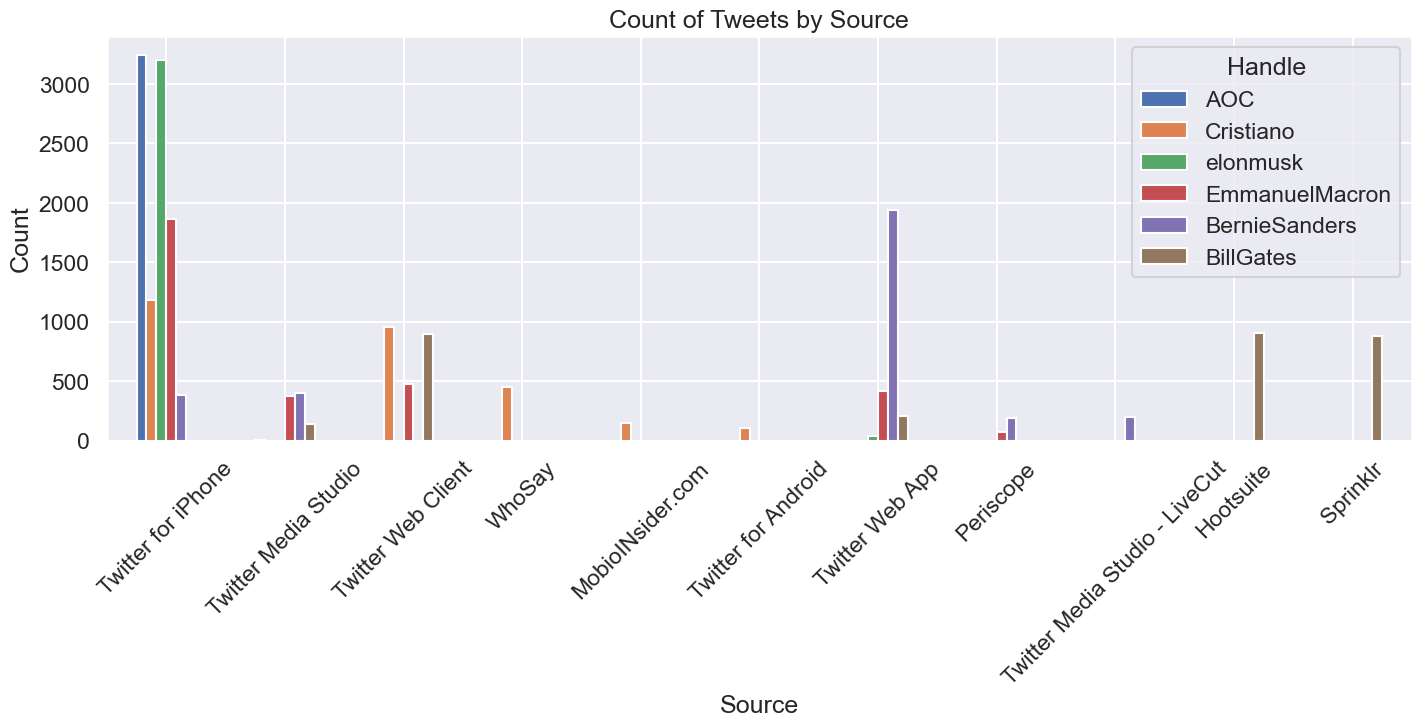

In [70]:
# Plotting the table for device counts.
def make_bar_plot(counts_df, title=None, xlabel=None, ylabel=None, ylog=False, legend=True):
    """
    Plot a side-by-side bar plot of each column in `counts_df`.
    
    Uses `pd.DataFrame.plot.bar` to plot a side-by-side bar plot of
    each column of `counts_df`. The index of `counts_df` should be the 
    categories to use on the x-axis and each column should have a value 
    corresponding to the height of the bar.
    
    Parameters
    ----------
        counts_df: pd.DataFrame
            a dataframe whose index is the x-axis and whose column values are 
            the heights of the bars in each group
        title: str, optional
            a title for the plot
        xlabel: str, optional
            a label for the x-axis
        ylabel: str, optional
            a label for the y-axis
        ylog: bool, optional
            whether to plot the y-axis on a log scale
        legend: bool, optional
            whether to include a legend with each key in `df_dict`
    """
    counts_df.plot.bar(figsize=(15, 5))
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if ylog:
        plt.yscale("log")
    if legend:
        plt.legend()


make_bar_plot(device_counts.T, title="Count of Tweets by Source",
               xlabel="Source", ylabel="Count")
plt.xticks(rotation=45)
plt.legend(title="Handle");

From the graph above, we can see that the counts of "Twitter for iPhone" is the highest for all three groups. This suggests that big media figures actually prefer to post by themselves from their own phones, perhaps for the ease of access and authenticity involved. We can also look into why Cristiano has used so many different platforms for posting his tweets. 

In the graph above, we used the number of tweets as a measure, but it might actually be might better to compare the proportions of each tweet. This is because if someone tends to most more tweets in general, their numbers will appear higher for whatever we are measuring. Hence, using proportions will give a more fair overview of the measurement for users as it shows the measurement in relation to the number of tweets each users posts.

## Part III. Time Series Analysis
Analyzing the time at which each tweet was posted - looking for insights about how a user spends their day, when they eat and sleep, etc.

---
### Step 1: Data Cleaning
We need to first clean the data of the "created_at" column - changing from (date and time) to hour of the day as a floating point number. 
Working with timestamps, we'll use the [`dt` accessors](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dt-accessor) from the Pandas library.

In [34]:
# Current formatting of the "created_at" column.
tweets["AOC"]["created_at"].head()

id
1358149122264563712   2021-02-06 20:22:38+00:00
1358147616400408576   2021-02-06 20:16:39+00:00
1358145332316667909   2021-02-06 20:07:35+00:00
1358145218407759875   2021-02-06 20:07:07+00:00
1358144207333036040   2021-02-06 20:03:06+00:00
Name: created_at, dtype: datetime64[ns, UTC]

In [73]:
# Uses the time_col ("created_at") to create result_col ("hour").
# Formula: hour + (minute/60) + (second/(60)^2)
def add_hour(df, time_col, result_col):
    df[result_col] = df[time_col].dt.hour + df[time_col].dt.minute/60 + df[time_col].dt.second/3600
    return df


tweets = {handle: add_hour(df, "created_at", "hour") for handle, df in tweets.items()}

tweets["BernieSanders"]["hour"].head()

id
1358184460794163202    22.717500
1358160808627363847    21.151111
1357819298841059328    22.533889
1357665265786499072    12.332778
1357489405737451521     0.685833
Name: hour, dtype: float64

In [75]:
#To account for different locations of each user in our analysis, 
# we will next adjust the `created_at` timestamp for each tweet to the respective timezone of each user. 

def convert_timezone(df, new_tz):
    df['converted_time'] = df['created_at'].dt.tz_convert(new_tz)
    return df

timezones = {"AOC": "EST", "Cristiano": "Europe/Lisbon", "elonmusk": "America/Los_Angeles", 
             "EmmanuelMacron": "Europe/Paris", "BernieSanders": "EST", "BillGates": "America/Los_Angeles"}

tweets = {handle: convert_timezone(df, tz) for (handle, df), tz in zip(tweets.items(), timezones.values())}
tweets = {handle: add_hour(df, "converted_time", "converted_hour") for handle, df in tweets.items()}

---
### Step 2: Time of Tweets
Next we'll look at the look at the distribution of tweets for each user by time of day.


In [76]:
# Placing the hours that the tweets were posted into bins.
def bin_df(df, bins, colname):
    binned = pd.cut(df[colname], bins).value_counts().sort_index()
    return pd.DataFrame({"counts": binned, "bin": bins[:-1]})

hour_bins = np.arange(0, 24.5, .5)
binned_hours = {handle: bin_df(df, hour_bins, "converted_hour") for handle, df in tweets.items()}

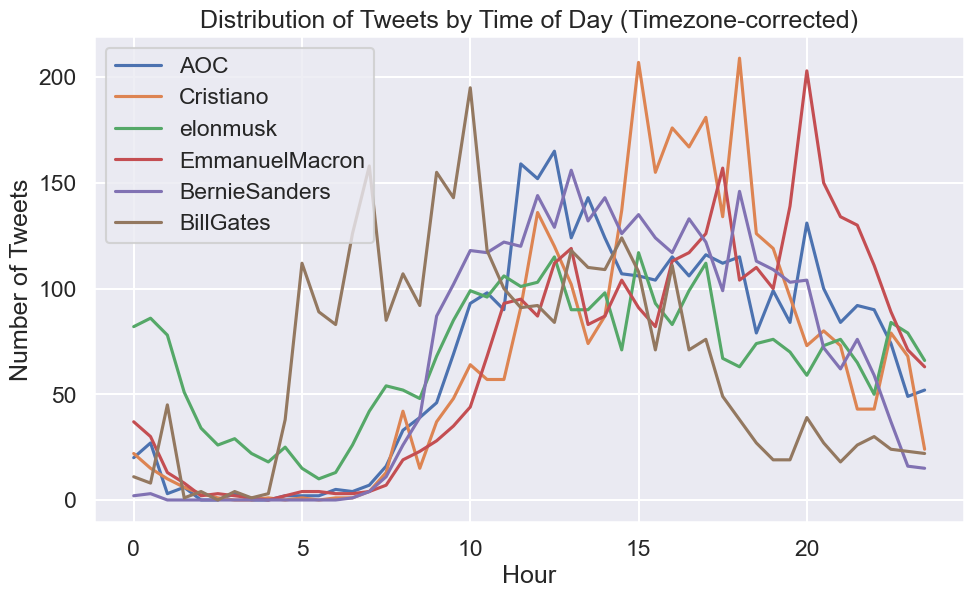

In [77]:
# Density plot of the number of tweets based on the hour they are posted. 
def make_line_plot(df_dict, x_col, y_col, include=None, title=None, xlabel=None, ylabel=None, legend=True):
    """
    Plot a line plot of two columns for each dataframe in `df_dict`.
    
    Uses `sns.lineplot` to plot a line plot of two columns for each
    dataframe in `df_dict`. The keys of `df_dict` are used as entries in
    the legend when `legend` is `True`.
    """
    
    #f include is not None:
       # df_dict = {k: v for k, v in df_dict.items() if k in include}

    plt.figure(figsize=[10,6])
    for handle, df in df_dict.items():
        sns.lineplot(x=x_col, y=y_col, data=df, label=handle)
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if not legend:
        plt.gca().get_legend().remove()

make_line_plot(binned_hours, "bin", "counts", title="Distribution of Tweets by Time of Day (Timezone-corrected)",
               xlabel="Hour", ylabel="Number of Tweets")

## Part IV. Sentiment Analysis
Analyzing the "sentiment" (or polarity) of the words in each tweet - looking to understand of how the Twitter users in question view certain subjects and people. Specifically, we'll narrow down the case to focus on the sentiment of each tweet in relation to other users mentioned. We'll use [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) to quantitatively do so. 

---
### Step 1: How to Measure "Sentiment"

**Understanding Sentiment**:
Different words have different sentiments associated with them. For instance, "I love burgers" vs. "I hate tomatoes". "Love" has a far more positive sentiment than "hate". There are also different levels of sentiment associated with words. For instance, "I love burgers" has a more positive sentiment than "I like burgers". 

**Measuring Sentiment**:
To measure the sentiment of each tweet, we'll use VADER, which is a lexicon and rule-based sentiment analysis tool that's specifically attuned to sentiments expressed in social media. Essentially, it parses each sentence into words and assigns a score to each word. By analyzing the words in each tweet, we can gather an understanding of the sentiment. 

**More on VADER**:
VADER's model is trained using Amazon Mechanical Turk (a crowdsourcing survey platform). The training dataset contains tweets, New York Times editorials and news articles, Rotten Tomatoes reviews, and Amazon product reviews. Each word in the dataset was reviewed and rated by at least 20 trained individuals who had signed up to work on these tasks through Mechanical Turk. 

In [21]:
# Reading the VADER lexicon into a dataframe called "sent"
# Each row contains the word (emojis included) and its polarity 
sent = pd.read_csv('vader_lexicon.txt',sep='\t',header=None,index_col=0).iloc[:,0:1]
sent.index.name = 'token'
sent.columns = ['polarity']
sent.head()

,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


---
### Step 2: Data Cleaning

In order to analyze each word, we need to ensure our tweets are in the proper format in relation to what we want to analyze. This way, the words can be matched properly with VADER's dictionary to accurately calculate our sentiment score. For our question, we need to clean our data to address punctuations and mentions of other users. 

In [22]:
# Applying the procedure to remove punctuations in a tweet
def sanitize_texts(df):
    df["clean_text"] = df['full_text'].str.lower().str.replace('([^\w\s])', ' ', regex=True)
    return df

tweets = {handle: sanitize_texts(df) for handle, df in tweets.items()}

# Exx: looking at AOC's tweets
tweets["AOC"]["clean_text"].head()

id
1358149122264563712                                                                                       rt  repescobar  our country has the moral obligation and responsibility to reunite every single family separated at the southern border \n\nt 
1358147616400408576                                                                                      rt  rokhanna  what happens when we guarantee  15 hour \n\n  31  of black workers and 26  of latinx workers get raises \n  a majority of essent 
1358145332316667909                                                                                                                                                                                                     source  https   t co 3o5jer6zpd 
1358145218407759875                                                 joe cunningham pledged to never take corporate pac money  and he never did  mace said she ll cash every check she gets  yet another way this is a downgrade  https   t co dytsqxkxgu
1

In [23]:
# Applying the procedure to extract user mentions
def extract_mentions(full_texts):
    mentions = full_texts.str.lower().str.extractall('@(\w*)')[0].rename("mentions").reset_index()
    mentions['mentions'].dropna
    return mentions[["mentions"]]

mentions = {handle: extract_mentions(df["full_text"]) for handle, df in tweets.items()}

# Examples from the table
horiz_concat_df(mentions).head()

,AOC,Cristiano,elonmusk
,mentions,mentions,mentions
0,repescobar,sixpadhomegym,dumdin7
1,rokhanna,globe_soccer,grimezsz
2,jaketapper,pestanacr7,grimezsz
3,repnancymace,goldenfootofficial,kristennetten
4,aoc,herbalife,kristennetten


To make sentiments easier to calculate, we'll convert the tweets into [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). Essentially, we'll restructure our tweets dataframe in a table that's in "tidy format". The "id" column refers to the tweet and the "word" contains words from each tweet.

In [24]:
# Converts the dataframe into a tidy format table
def to_tidy_format(df):
    tidy = (
        df["clean_text"]
        .str.split()
        .explode()
        .to_frame()
        .rename(columns={"clean_text": "word"})
    )
    return tidy

tidy_tweets = {handle: to_tidy_format(df) for handle, df in tweets.items()}

# Example from AOC's column
tidy_tweets["AOC"].head()

,word
id,
1358149122264563712,rt
1358149122264563712,repescobar
1358149122264563712,our
1358149122264563712,country
1358149122264563712,has


Now we can join our cleaned tweets table with the lexicon table, specifically adding a "polarity" column with the sum of the sentiment polarity of each tweet.

In [25]:
# just run this cell
def add_polarity(df, tidy_df):
    df["polarity"] = (
        tidy_df
        .merge(sent, how='left', left_on='word', right_index=True)
        .reset_index()
        .loc[:, ['id', 'polarity']]
        .fillna(0)
        .groupby('id')
        .sum()
    )
    return df

tweets = {handle: add_polarity(df, tidy_df) for (handle, df), tidy_df in \
          zip(tweets.items(), tidy_tweets.values())}
tweets["AOC"][["clean_text", "polarity"]].head()

,clean_text,polarity
id,,
1358149122264563712,rt repescobar our country has the moral obligation and responsibility to reunite every single family separated at the southern border \n\nt,0.0
1358147616400408576,rt rokhanna what happens when we guarantee 15 hour \n\n 31 of black workers and 26 of latinx workers get raises \n a majority of essent,1.0
1358145332316667909,source https t co 3o5jer6zpd,0.0
1358145218407759875,joe cunningham pledged to never take corporate pac money and he never did mace said she ll cash every check she gets yet another way this is a downgrade https t co dytsqxkxgu,0.0
1358144207333036040,what s even more gross is that mace takes corporate pac money \n\nshe s already funded by corporations now she s choosing to swindle working people on top of it \n\npeak scam artistry caps for cash https t co ccvxgdf6id,-6.4


---
### Step 3: Polarity of Tweets (w/ Mentions)
Next we'll analyze the sentiment of each tweet in relation to the users mentioned in the tweet.

In [26]:
# Calculates the mean sentiment scores of the tweets in relation to the mentioned users
def mention_polarity(df, mention_df):
    df = df.reset_index()
    mention_df = mention_df.reset_index()
    merged_df = df.merge(mention_df, left_index=True, right_index=True)
    mention_sentiment = merged_df.groupby('mentions')['polarity'].mean()
    return mention_sentiment

# Look at the polarity of AOC's tweets with mentions in it
aoc_mention_polarity = mention_polarity(tweets["AOC"], mentions["AOC"]).sort_values(ascending=False)
print(aoc_mention_polarity)

mentions
elizacollins1      16.3
rioixm             14.3
nikkischwab        13.0
gatesfoundation    12.2
itsjuanlove        11.4
                   ... 
marshablackburn   -11.1
sarahhuckabee     -14.0
zephyrteachout    -15.1
reveal            -15.2
michaelcdeibert   -15.7
Name: polarity, Length: 1182, dtype: float64


We should use the aggregation function sum when grouping by meantions and aggregating the polarity so that 0 can be used as the middle ground basis for measurement. Using the mean may result in a skewed result from large positive or negative values that will be accounted for more than other polarities in the measurment. 

## Part V. EDA
Now that we've done a preliminary analysis of the tweets and finished cleaning/setting up the data, we're going to dive deeper and answer different questions.

---
### Q1: Top Source Devices over the Years


---
### Q2: How does sentiment vary with the time of each tweet?



---
### Q3: Sentiment of tweets over time?


---
### Q4: Distribution of Likes by Time?

---
### Q5: Word Cloud - Most Common Words

---
### Q6: Hashtag Analysis

---
### Q7: Topic Modeling

---
### Q8: Content Length Analysis